# Working with time series data

Some imports:

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-deep', 'seaborn-darkgrid', 'seaborn-notebook'])

pd.options.display.max_rows = 8

## Case study: air quality data of European monitoring stations (AirBase)

AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe. 

In [3]:
from IPython.display import HTML
HTML('<iframe src=http://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8#tab-data-by-country width=900 height=350></iframe>')

I downloaded and preprocessed some of the data ([python-airbase](https://github.com/jorisvandenbossche/python-airbase)): `data/airbase_data.csv`. This file includes the hourly concentrations of NO2 for 4 different measurement stations:

- FR04037 (PARIS 13eme): urban background site at Square de Choisy
- FR04012 (Paris, Place Victor Basch): urban traffic site at Rue d'Alesia
- BETR802: urban traffic site in Antwerp, Belgium
- BETN029: rural background site in Houtem, Belgium

See http://www.eea.europa.eu/themes/air/interactive/no2

## Importing the data

Import the csv file:

In [4]:
!head -5 data/airbase_data.csv

,BETR801,BETN029,FR04037,FR04012
1998-01-01 00:00:00,-9999,16.0,-9999,-9999
1998-01-01 01:00:00,-9999,13.0,-9999,-9999
1998-01-01 02:00:00,-9999,12.0,-9999,-9999
1998-01-01 03:00:00,-9999,12.0,-9999,-9999


As you can see, the missing values are indicated by `-9999`. This can be recognized by `read_csv` by passing the `na_values` keyword:

In [5]:
data = pd.read_csv('data/airbase_data.csv', index_col=0, parse_dates=True, na_values=[-9999])

## Exploring the data - recap of some useful methods

Some useful methods:

`head` and `tail`

In [6]:
data.head(3)

,BETR801,BETN029,FR04037,FR04012
1998-01-01 00:00:00,NaN,16.0,NaN,NaN
1998-01-01 01:00:00,NaN,13.0,NaN,NaN
1998-01-01 02:00:00,NaN,12.0,NaN,NaN


In [7]:
data.tail()

,BETR801,BETN029,FR04037,FR04012
2012-12-31 19:00:00,21.0,2.5,28.0,67.0
2012-12-31 20:00:00,16.5,2.0,16.0,47.0
2012-12-31 21:00:00,14.5,2.5,13.0,43.0
2012-12-31 22:00:00,16.5,3.5,14.0,42.0
2012-12-31 23:00:00,15.0,3.0,13.0,49.0


`info()`

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131265 entries, 1998-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 4 columns):
BETR801    113252 non-null float64
BETN029    119703 non-null float64
FR04037    120384 non-null float64
FR04012    119448 non-null float64
dtypes: float64(4)
memory usage: 5.0 MB


Getting some basic summary statistics about the data with `describe`:

In [9]:
data.describe()

,BETR801,BETN029,FR04037,FR04012
count,113252.000000,119703.000000,120384.000000,119448.000000
mean,47.049302,16.542171,40.040005,87.993261
std,21.733629,12.446040,23.024347,41.317684
min,1.000000,1.000000,0.000000,0.000000
25%,31.000000,7.000000,23.000000,61.000000
50%,45.000000,12.000000,37.000000,88.000000
75%,60.000000,23.000000,54.000000,115.000000
max,339.000000,105.000000,256.000000,358.000000


Quickly visualizing the data

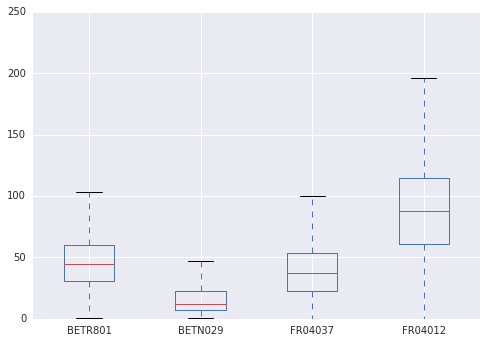

In [10]:
data.plot(kind='box', ylim=[0,250])

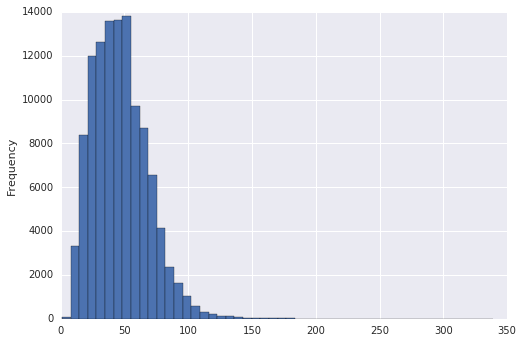

In [11]:
data['BETR801'].plot(kind='hist', bins=50)

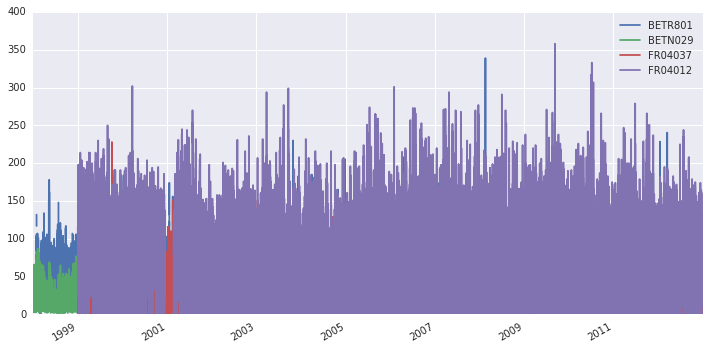

In [12]:
data.plot(figsize=(12,6))

This does not say too much ..

We can select part of the data (eg the latest 500 data points):

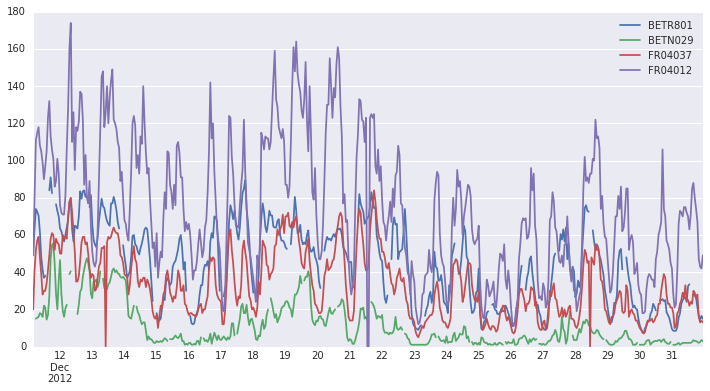

In [13]:
data[-500:].plot(figsize=(12,6))

Or we can use some more advanced time series features -> next section!

## Working with time series data

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [14]:
data.index

DatetimeIndex(['1998-01-01 00:00:00', '1998-01-01 01:00:00',
               '1998-01-01 02:00:00', '1998-01-01 03:00:00',
               '1998-01-01 04:00:00', '1998-01-01 05:00:00',
               '1998-01-01 06:00:00', '1998-01-01 07:00:00',
               '1998-01-01 08:00:00', '1998-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=131265, freq=None)

Indexing a time series works with strings:

In [15]:
data["2010-01-01 09:00":"2010-01-01 12:00"]

,BETR801,BETN029,FR04037,FR04012
2010-01-01 09:00:00,17.0,7.0,19.0,41.0
2010-01-01 10:00:00,18.0,5.0,21.0,48.0
2010-01-01 11:00:00,17.0,4.0,23.0,63.0
2010-01-01 12:00:00,18.0,4.0,22.0,57.0


A nice feature is **"partial string" indexing**, where we can do implicit slicing by providing a partial datetime string.

E.g. all data of 2012:

In [16]:
data['2012']

,BETR801,BETN029,FR04037,FR04012
2012-01-01 00:00:00,21.0,1.0,17.0,56.0
2012-01-01 01:00:00,18.0,1.0,16.0,50.0
2012-01-01 02:00:00,20.0,1.0,14.0,46.0
2012-01-01 03:00:00,16.0,1.0,17.0,47.0
...,...,...,...,...
2012-12-31 20:00:00,16.5,2.0,16.0,47.0
2012-12-31 21:00:00,14.5,2.5,13.0,43.0
2012-12-31 22:00:00,16.5,3.5,14.0,42.0
2012-12-31 23:00:00,15.0,3.0,13.0,49.0


Normally you would expect this to access a column named '2012', but as for a DatetimeIndex, pandas also tries to interprete it as a datetime slice.

Or all data of January up to March 2012:

In [17]:
data['2012-01':'2012-03']

,BETR801,BETN029,FR04037,FR04012
2012-01-01 00:00:00,21.0,1.0,17.0,56.0
2012-01-01 01:00:00,18.0,1.0,16.0,50.0
2012-01-01 02:00:00,20.0,1.0,14.0,46.0
2012-01-01 03:00:00,16.0,1.0,17.0,47.0
...,...,...,...,...
2012-03-31 20:00:00,38.0,6.0,19.0,46.0
2012-03-31 21:00:00,36.0,8.0,17.0,56.0
2012-03-31 22:00:00,34.0,8.0,18.0,59.0
2012-03-31 23:00:00,38.0,8.0,24.0,54.0


Time and date components can be accessed from the index:

In [18]:
data.index.hour

array([ 0,  1,  2, ..., 21, 22, 23], dtype=int32)

In [19]:
data.index.year

array([1998, 1998, 1998, ..., 2012, 2012, 2012], dtype=int32)

<div class="alert alert-success">
    <b>EXERCISE</b>: select all data starting from 1999
</div>

In [20]:
data = data['1999':]

<div class="alert alert-success">
    <b>EXERCISE</b>: select all data in January for all different years
</div>

In [21]:
data[data.index.month == 1]

,BETR801,BETN029,FR04037,FR04012
1999-01-01 00:00:00,27.0,13.0,68.0,105.0
1999-01-01 01:00:00,33.0,15.0,70.0,116.0
1999-01-01 02:00:00,24.0,16.0,72.0,114.0
1999-01-01 03:00:00,26.0,18.0,72.0,91.0
...,...,...,...,...
2012-01-31 20:00:00,53.5,41.0,61.0,79.0
2012-01-31 21:00:00,50.0,36.0,60.0,79.0
2012-01-31 22:00:00,45.0,33.0,58.0,79.0
2012-01-31 23:00:00,41.0,31.5,51.0,67.0


<div class="alert alert-success">
    <b>EXERCISE</b>: select all data in January, February and March for all different years
</div>

In [22]:
data['months'] = data.index.month
data[data['months'].isin([1, 2, 3])]

,BETR801,BETN029,FR04037,FR04012,months
1999-01-01 00:00:00,27.0,13.0,68.0,105.0,1
1999-01-01 01:00:00,33.0,15.0,70.0,116.0,1
1999-01-01 02:00:00,24.0,16.0,72.0,114.0,1
1999-01-01 03:00:00,26.0,18.0,72.0,91.0,1
...,...,...,...,...,...
2012-03-31 20:00:00,38.0,6.0,19.0,46.0,3
2012-03-31 21:00:00,36.0,8.0,17.0,56.0,3
2012-03-31 22:00:00,34.0,8.0,18.0,59.0,3
2012-03-31 23:00:00,38.0,8.0,24.0,54.0,3


<div class="alert alert-success">
    <b>EXERCISE</b>: select all 'daytime' data (between 8h and 20h) for all days
</div>

In [23]:
data[(data.index.hour >= 8) & (data.index.hour < 20)]

,BETR801,BETN029,FR04037,FR04012,months
1999-01-01 08:00:00,28.0,20.0,65.0,70.0,1
1999-01-01 09:00:00,29.0,17.0,66.0,70.0,1
1999-01-01 10:00:00,36.0,15.0,58.0,79.0,1
1999-01-01 11:00:00,35.0,15.0,42.0,68.0,1
...,...,...,...,...,...
2012-12-31 16:00:00,28.0,3.5,30.0,88.0,12
2012-12-31 17:00:00,27.5,3.0,29.0,80.0,12
2012-12-31 18:00:00,26.0,3.0,26.0,74.0,12
2012-12-31 19:00:00,21.0,2.5,28.0,67.0,12


In [24]:
data.between_time('08:00', '20:00')

,BETR801,BETN029,FR04037,FR04012,months
1999-01-01 08:00:00,28.0,20.0,65.0,70.0,1
1999-01-01 09:00:00,29.0,17.0,66.0,70.0,1
1999-01-01 10:00:00,36.0,15.0,58.0,79.0,1
1999-01-01 11:00:00,35.0,15.0,42.0,68.0,1
...,...,...,...,...,...
2012-12-31 17:00:00,27.5,3.0,29.0,80.0,12
2012-12-31 18:00:00,26.0,3.0,26.0,74.0,12
2012-12-31 19:00:00,21.0,2.5,28.0,67.0,12
2012-12-31 20:00:00,16.5,2.0,16.0,47.0,12


In [25]:
# re-read data for clean start
data = pd.read_csv('data/airbase_data.csv', index_col=0, parse_dates=True, na_values=[-9999])
data = data['1999':]

## The power of pandas: `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

The time series has a frequency of 1 hour. I want to change this to daily:

In [26]:
data.resample('D').mean().head()

,BETR801,BETN029,FR04037,FR04012
1999-01-01,35.500000,16.363636,65.166667,86.250000
1999-01-02,26.681818,7.727273,38.833333,66.916667
1999-01-03,19.636364,8.818182,34.166667,65.500000
1999-01-04,35.294118,4.772727,41.041667,67.541667
1999-01-05,54.250000,12.954545,59.291667,96.416667


<div class="alert alert-danger">
    <b>NOTE</b>: with older versions of pandas, <code>data.resample('D').mean()</code> was expressed as <code>data.resample('D', how='mean')</code>.
</div>

Similar to `groupby`, other methods can also be specified:

In [27]:
data.resample('D').max().head()

,BETR801,BETN029,FR04037,FR04012
1999-01-01,48.0,21.0,85.0,116.0
1999-01-02,43.0,19.0,65.0,112.0
1999-01-03,31.0,24.0,67.0,128.0
1999-01-04,56.0,8.0,65.0,112.0
1999-01-05,70.0,34.0,75.0,198.0


The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases  
These strings can also be combined with numbers, eg `'10D'`.

Further exploring the data:

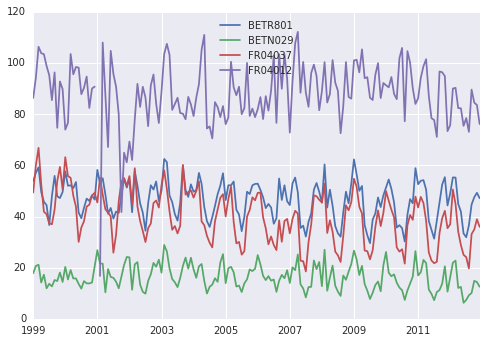

In [28]:
data.resample('M').mean().plot() # 'A'

In [28]:
# data['2012'].resample('D').mean().plot()

<div class="alert alert-success">
    <b>QUESTION</b>: plot the monthly mean and median concentration of the 'FR04037' station for the years 2009-2012
</div>

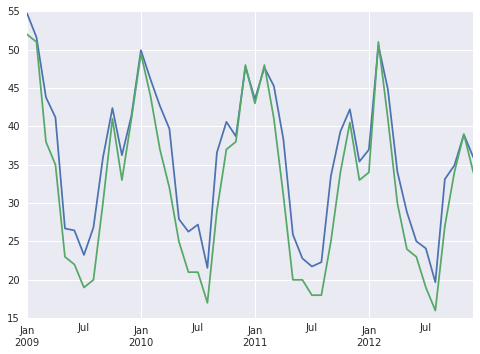

In [29]:
data.loc['2009':, 'FR04037'].resample('M').mean().plot()
data.loc['2009':, 'FR04037'].resample('M').median().plot()

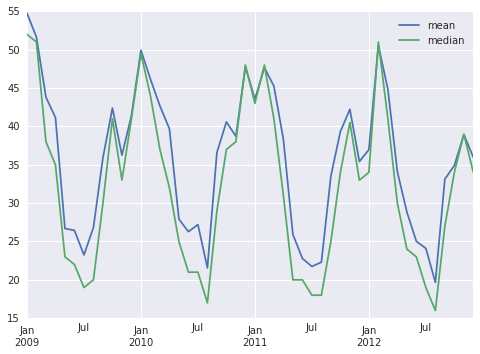

In [30]:
data.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'median']).plot()

<div class="alert alert-success">
    <b>QUESTION</b>: plot the monthly mininum and maximum daily concentration of the 'BETR801' station
</div>

In [31]:
daily = data['FR04037'].resample('D').mean()

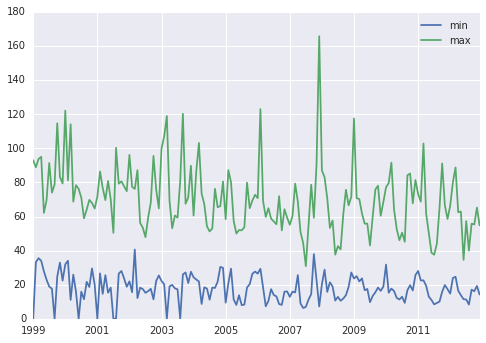

In [32]:
daily.resample('M').agg(['min', 'max']).plot()

<div class="alert alert-success">
    <b>QUESTION</b>: make a bar plot of the mean of the stations in year of 2012
</div>

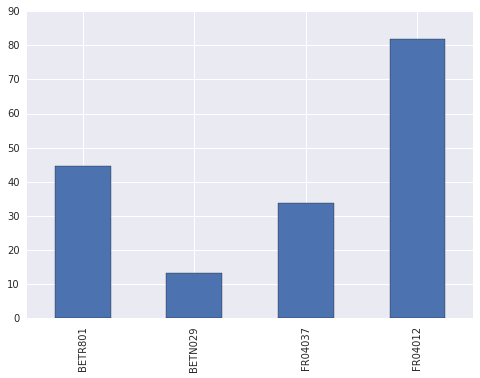

In [33]:
data['2012'].mean().plot(kind='bar')

<div class="alert alert-success">
    <b>QUESTION</b>: The evolution of the yearly averages with, and the overall mean of all stations (indicate the overall mean with a thicker black line)?
</div>

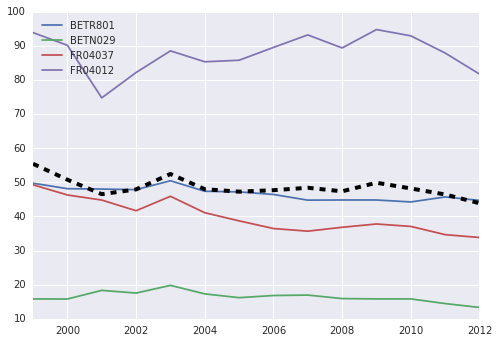

In [34]:
data.resample('A').mean().plot()
data.mean(axis=1).resample('A').mean().plot(color='k', linestyle='--', linewidth=4)

## Combination with groupby

`resample` can actually be seen as a specific kind of `groupby`. E.g. taking annual means with `data.resample('A', 'mean')` is equivalent to `data.groupby(data.index.year).mean()` (only the result of `resample` still has a DatetimeIndex).



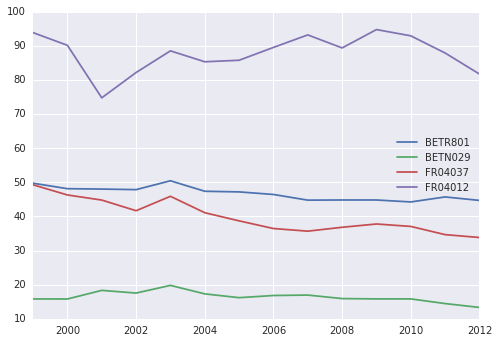

In [35]:
data.groupby(data.index.year).mean().plot()

But, `groupby` is more flexible and can also do resamples that do not result in a new continuous time series, e.g. by grouping by the hour of the day to get the diurnal cycle.

<div class="alert alert-success">
    <b>QUESTION</b>: how does the *typical monthly profile* look like for the different stations?
</div>

1\. add a column to the dataframe that indicates the month (integer value of 1 to 12):

In [36]:
data['month'] = data.index.month

2\. Now, we can calculate the mean of each month over the different years:

In [37]:
data.groupby('month').mean()

,BETR801,BETN029,FR04037,FR04012
month,,,,
1,51.955189,19.832429,47.634409,82.472813
2,53.721187,20.238004,50.564499,83.973207
3,53.737157,19.741470,47.862715,96.272138
4,49.445248,17.865095,40.943117,95.962862
...,...,...,...,...
9,47.193898,14.292315,39.706019,93.000316
10,48.649218,17.007418,44.010934,86.297836
11,50.186465,17.900151,45.564683,87.173878
12,50.194588,20.200031,45.262243,81.817977


3\. plot the typical monthly profile of the different stations:

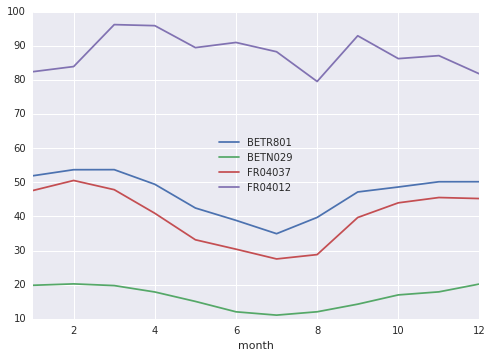

In [38]:
data.groupby('month').mean().plot()

<div class="alert alert-success">
    <b>QUESTION</b>: plot the weekly 95% percentiles of the concentration in 'BETR801' and 'BETN029' for 2011
</div>

In [39]:
df2011 = data['2011'].dropna()

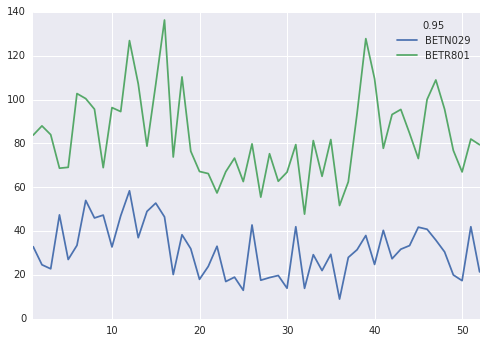

In [40]:
df2011 = data['2011'].dropna()
df2011.groupby(df2011.index.week)[['BETN029', 'BETR801']].quantile(0.95).plot()

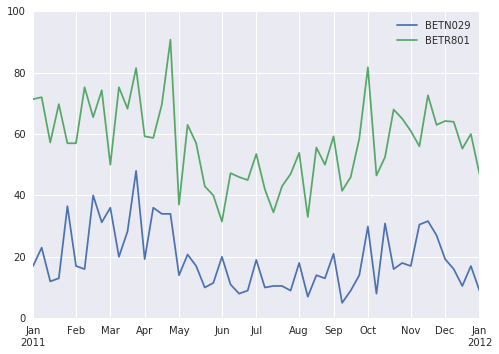

In [41]:
df2011[['BETN029', 'BETR801']].resample('W').agg(lambda x: x.quantile(0.75)).plot()

In [42]:
data = data.drop('month', axis=1)

<div class="alert alert-success">
    <b>QUESTION</b>: The typical diurnal profile for the different stations?
</div>

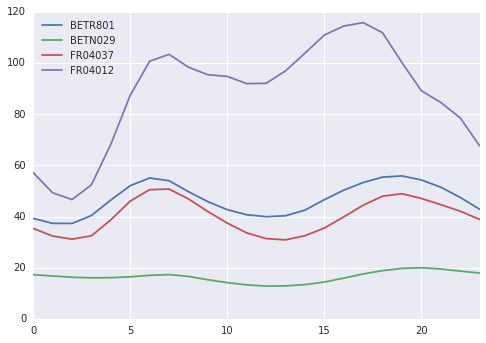

In [43]:
data.groupby(data.index.hour).mean().plot()

<div class="alert alert-success">
    <b>QUESTION</b>: What are the number of exceedances of hourly values above the European limit 200 µg/m3 for each year/station?
</div>

In [44]:
exceedances = data > 200

In [45]:
# group by year and count exceedances (sum of boolean)
exceedances = exceedances.groupby(exceedances.index.year).sum()

In [46]:
exceedances

,BETR801,BETN029,FR04037,FR04012
1999,0.0,0.0,3.0,39.0
2000,0.0,0.0,0.0,17.0
2001,0.0,0.0,0.0,88.0
2002,0.0,0.0,0.0,12.0
...,...,...,...,...
2009,0.0,0.0,0.0,58.0
2010,0.0,0.0,0.0,104.0
2011,1.0,0.0,0.0,62.0
2012,6.0,0.0,0.0,13.0


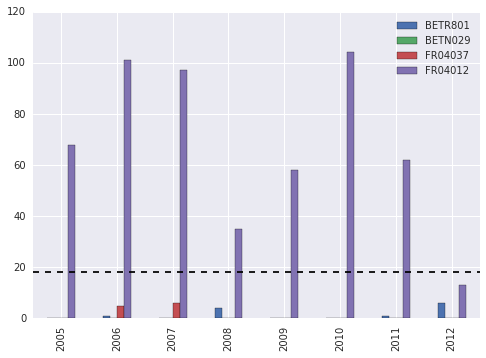

In [47]:
ax = exceedances.loc[2005:].plot(kind='bar')
ax.axhline(18, color='k', linestyle='--')

<div class="alert alert-success">
    <b>QUESTION</b>: And are there exceedances of the yearly limit value of 40 µg/m3 since 2000 ?
</div>

In [49]:
yearly = data['2000':].resample('A').mean()

In [50]:
(yearly > 40).sum()

BETR801    13
BETN029     0
FR04037     5
FR04012    13
dtype: int64

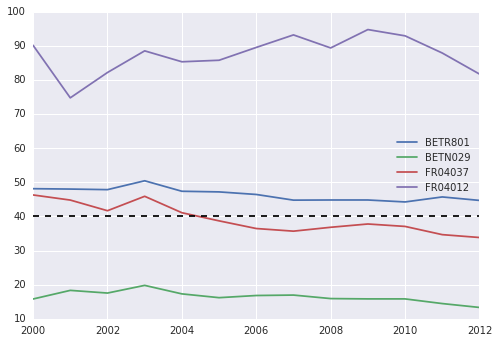

In [51]:
yearly.plot()
plt.axhline(40, linestyle='--', color='k')

<div class="alert alert-success">
    <b>QUESTION</b>: The maximum daily 8 hour mean should be below 100 µg/m³. What are the number of exceedances of this limit for each year/station?
</div>

Tip: have a look at the `rolling` method to perform moving window operations.

Note: this is not an actual limit for NO2, but a nice exercise to introduce the `rolling` method. Other pollutans, such as 03 have actually such kind of limit values.

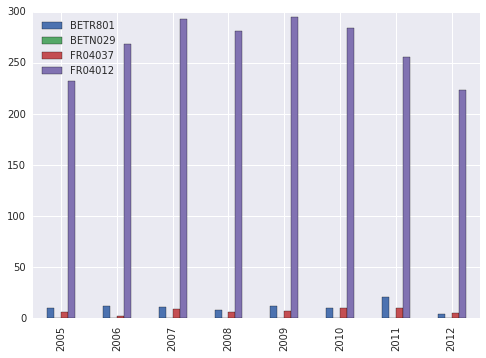

In [52]:
exceedances = data.rolling(8).mean().resample('D').max() > 100
exceedances = exceedances.groupby(exceedances.index.year).sum()
ax = exceedances.loc[2005:].plot(kind='bar')

<div class="alert alert-success">
    <b>QUESTION</b>: Calculate the correlation between the different stations
</div>


In [53]:
data[['BETR801', 'BETN029', 'FR04037', 'FR04012']].corr()

,BETR801,BETN029,FR04037,FR04012
BETR801,1.000000,0.472954,0.561676,0.394446
BETN029,0.472954,1.000000,0.401864,0.186997
FR04037,0.561676,0.401864,1.000000,0.433466
FR04012,0.394446,0.186997,0.433466,1.000000


In [54]:
data[['BETR801', 'BETN029', 'FR04037', 'FR04012']].resample('D').mean().corr()

,BETR801,BETN029,FR04037,FR04012
BETR801,1.000000,0.604825,0.663855,0.459885
BETN029,0.604825,1.000000,0.527390,0.312484
FR04037,0.663855,0.527390,1.000000,0.453584
FR04012,0.459885,0.312484,0.453584,1.000000
